In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, make_scorer
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score, jaccard_score, fowlkes_mallows_score
import math
from sklearn.linear_model import Lasso
from itertools import product
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2024-01-29 00:31:04.921799: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 00:31:04.968803: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 00:31:04.969875: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-29 00:31:05.818520: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )

    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.grid(True)
    
    return plt

In [3]:
n_jobs=-1
sns.set_theme()

In [4]:
df_training = pd.read_csv('https_training.csv')
df_test = pd.read_csv('https_test.csv')
df = pd.concat([df_training, df_test], ignore_index=True)
df.loc[df['label'] == "_other", 'label'] = "other" # Variables that starts with _ generate error with t-SNE
df

,_c_ack_cnt,_c_ack_cnt_p,_c_appdataB,_c_appdataT,_c_bytes_all,_c_bytes_retx,_c_bytes_uniq,_c_cwin_ini,_c_cwin_max,_c_cwin_min,...,_s_ttl_max,_s_ttl_min,_s_win_0,_s_win_max,_s_win_min,_s_win_scl,_tls_session_stat,c_ip,time,label
0,8.0,4.0,569.0,522.003,1672.0,0.0,1672.0,517.0,590.0,51.0,...,59.0,59.0,0.0,31232.0,27680.0,9.0,1.0,67.32.225.92,1.561932e+09,krxd.net
1,10.0,7.0,275.0,39.504,636.0,0.0,636.0,181.0,362.0,1.0,...,59.0,59.0,0.0,29480.0,27680.0,0.0,0.0,67.32.181.213,1.561932e+09,other
2,7.0,3.0,569.0,110.003,3325.0,0.0,3325.0,517.0,1435.0,51.0,...,59.0,59.0,0.0,34304.0,27680.0,9.0,1.0,67.32.225.92,1.561932e+09,contextweb.com
3,8.0,3.0,453.0,8.813,958.0,0.0,958.0,401.0,557.0,1.0,...,59.0,59.0,0.0,30208.0,27920.0,9.0,0.0,67.32.124.163,1.561932e+09,twitchcdn.net
4,6.0,2.0,0.0,0.000,452.0,0.0,452.0,401.0,401.0,1.0,...,59.0,59.0,0.0,29184.0,27920.0,9.0,0.0,67.32.124.163,1.561932e+09,twitchcdn.net
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262438,27.0,7.0,611.0,16.013,2965.0,13.0,2952.0,517.0,2397.0,38.0,...,59.0,59.0,0.0,34816.0,27920.0,9.0,1.0,67.32.51.91,1.562018e+09,other
262439,13.0,2.0,569.0,10.008,1425.0,6.0,1419.0,517.0,902.0,51.0,...,59.0,59.0,0.0,30720.0,27920.0,9.0,1.0,67.32.124.70,1.562018e+09,krxd.net
262440,7.0,3.0,611.0,24.000,997.0,0.0,997.0,517.0,517.0,93.0,...,59.0,59.0,0.0,30208.0,27680.0,9.0,1.0,67.32.35.141,1.562018e+09,other
262441,7.0,3.0,0.0,0.000,610.0,0.0,610.0,517.0,517.0,93.0,...,59.0,59.0,0.0,29184.0,27920.0,9.0,1.0,67.32.124.70,1.562018e+09,krxd.net


In [5]:
four_df = df[['_c_appdataB', '_s_appdataB', '_s_pkts_data_avg', '_c_pkts_data_avg']]
four_df

,_c_appdataB,_s_appdataB,_s_pkts_data_avg,_c_pkts_data_avg
0,569.0,161.0,516.500000,418.000000
1,275.0,7033.0,980.625000,212.000000
2,569.0,161.0,756.500000,831.250000
3,453.0,129.0,276.000000,319.333333
4,0.0,0.0,128.000000,226.000000
...,...,...,...,...
262438,611.0,7415.0,718.272727,156.052632
262439,569.0,161.0,306.000000,158.333333
262440,611.0,4555.0,794.142857,332.333333
262441,0.0,0.0,1105.400000,305.000000


In [6]:
scaler = StandardScaler()

df_training_4 = four_df.iloc[:len(df_training)].copy()
df_test_4 = four_df.iloc[len(df_training):].copy()

df_training_scaled = pd.DataFrame(scaler.fit_transform(df_training_4), columns=df_training_4.columns)
df_test_scaled = pd.DataFrame(scaler.transform(df_test_4), columns=df_test_4.columns)

df_training_scaled['label'] = df.iloc[:len(df_training)]['label'].copy().reset_index(drop=True)
df_test_scaled['label'] = df.iloc[len(df_training):]['label'].copy().reset_index(drop=True)

df_norm_scaled = pd.concat([df_training_scaled, df_test_scaled], ignore_index=True)
df_norm_scaled

,_c_appdataB,_s_appdataB,_s_pkts_data_avg,_c_pkts_data_avg,label
0,0.574035,-1.106620,-0.970144,0.838752,krxd.net
1,-0.605697,1.315792,0.248992,-0.349889,other
2,0.574035,-1.106620,-0.339726,3.223248,contextweb.com
3,0.108562,-1.117900,-1.601875,0.269435,twitchcdn.net
4,-1.709188,-1.163373,-1.990632,-0.269108,twitchcdn.net
...,...,...,...,...,...
262438,0.742568,1.450449,-0.440139,-0.672712,other
262439,0.574035,-1.106620,-1.523073,-0.659552,krxd.net
262440,0.742568,0.442285,-0.240848,0.344447,other
262441,-1.709188,-1.163373,0.576744,0.186730,krxd.net


In [7]:
X_train = df_training_scaled.drop('label', axis=1)
y_train = df_training_scaled['label']
X_test = df_test_scaled.drop('label', axis=1)
y_test = df_test_scaled['label']

# Random Forest

In [19]:
random_forest_model = RandomForestClassifier(random_state=42, n_jobs = n_jobs)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [20]:
y_pred = random_forest_model.predict(X_train)
print(classification_report(y_train, y_pred))

                       precision    recall  f1-score   support

            adnxs.com       0.99      0.98      0.99      3839
      ads-twitter.com       1.00      0.98      0.99      1325
        chartbeat.com       0.99      0.99      0.99      1413
       contextweb.com       1.00      0.97      0.98      2824
           disqus.com       1.00      0.97      0.98      3173
      everesttech.net       0.99      0.99      0.99      3408
  fastly-insights.com       1.00      0.99      0.99      1309
           fastly.net       1.00      0.98      0.99      1869
            ftcdn.net       1.00      1.00      1.00      3455
            giphy.com       1.00      0.96      0.98      3886
githubusercontent.com       1.00      1.00      1.00      4271
             krxd.net       0.93      1.00      0.96     11144
         newrelic.com       0.99      0.97      0.98      2182
                other       0.99      0.98      0.98     35083
         outbrain.com       0.98      0.86      0.92  

In [21]:
y_pred = random_forest_model.predict(X_test)
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

            adnxs.com       0.88      0.87      0.87      2942
      ads-twitter.com       0.91      0.87      0.89      1135
        chartbeat.com       0.90      0.92      0.91      1717
       contextweb.com       0.81      0.77      0.79      2383
           disqus.com       0.82      0.64      0.72      3246
      everesttech.net       0.86      0.85      0.86      2894
  fastly-insights.com       0.92      0.80      0.86       686
           fastly.net       0.85      0.73      0.78      1455
            ftcdn.net       0.98      0.96      0.97      1607
            giphy.com       0.87      0.83      0.85      1730
githubusercontent.com       0.92      0.83      0.87      4477
             krxd.net       0.85      0.91      0.88     11171
         newrelic.com       0.82      0.82      0.82      1604
                other       0.86      0.83      0.84     34777
         outbrain.com       0.65      0.58      0.61  

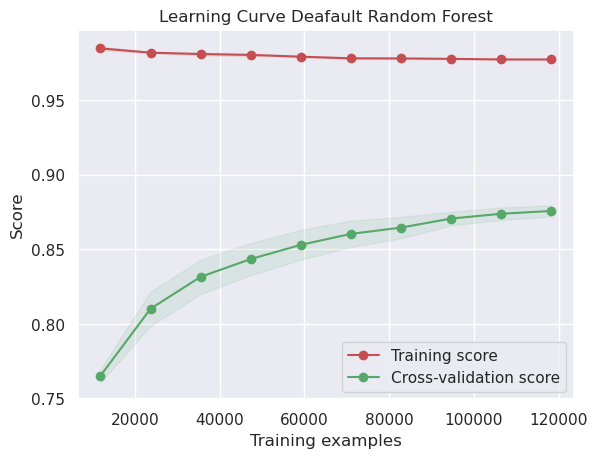

In [23]:
plot_learning_curve(random_forest_model, X_train, y_train, title="Learning Curve Deafault Random Forest")
plt.show()

## Hyperparameters tuning

In [ ]:
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=n_jobs), param_grid_rf, cv=5, scoring='accuracy', n_jobs = n_jobs, verbose=3)

grid_search_rf.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search_rf.best_params_)

# Best_Hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [8]:
#### TEST TO NOT RECOMPILE CROSS VALIDATION

Best_Hyperparameters = {'class_weight': None, 'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
best_model_rf = RandomForestClassifier(
    random_state=42,
    n_jobs=n_jobs,
    class_weight=Best_Hyperparameters['class_weight'],
    criterion=Best_Hyperparameters['criterion'],
    max_depth=Best_Hyperparameters['max_depth'],
    min_samples_leaf=Best_Hyperparameters['min_samples_leaf'],
    min_samples_split=Best_Hyperparameters['min_samples_split'],
    n_estimators=Best_Hyperparameters['n_estimators']
)

In [9]:
best_model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_jobs=-1, random_state=42)

In [10]:
y_pred_best_rf = best_model_rf.predict(X_train)
print("Classification Report on Train Set:")
print(classification_report(y_train, y_pred_best_rf))

Classification Report on Train Set:
                       precision    recall  f1-score   support

            adnxs.com       0.99      0.98      0.99      3839
      ads-twitter.com       1.00      0.98      0.99      1325
        chartbeat.com       0.99      0.98      0.99      1413
       contextweb.com       0.99      0.95      0.97      2824
           disqus.com       1.00      0.94      0.97      3173
      everesttech.net       0.99      0.99      0.99      3408
  fastly-insights.com       1.00      0.99      0.99      1309
           fastly.net       1.00      0.98      0.99      1869
            ftcdn.net       1.00      1.00      1.00      3455
            giphy.com       0.99      0.93      0.96      3886
githubusercontent.com       1.00      0.99      0.99      4271
             krxd.net       0.92      0.99      0.95     11144
         newrelic.com       0.99      0.96      0.97      2182
                other       0.99      0.97      0.98     35083
         outbrain.

In [11]:
y_pred_best_rf = best_model_rf.predict(X_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_best_rf))

Classification Report on Test Set:
                       precision    recall  f1-score   support

            adnxs.com       0.89      0.87      0.88      2942
      ads-twitter.com       0.90      0.87      0.88      1135
        chartbeat.com       0.91      0.91      0.91      1717
       contextweb.com       0.81      0.77      0.79      2383
           disqus.com       0.84      0.64      0.73      3246
      everesttech.net       0.88      0.86      0.87      2894
  fastly-insights.com       0.92      0.80      0.86       686
           fastly.net       0.82      0.72      0.77      1455
            ftcdn.net       0.99      0.96      0.97      1607
            giphy.com       0.89      0.84      0.86      1730
githubusercontent.com       0.92      0.83      0.87      4477
             krxd.net       0.84      0.92      0.88     11171
         newrelic.com       0.83      0.81      0.82      1604
                other       0.86      0.83      0.84     34777
         outbrain.c

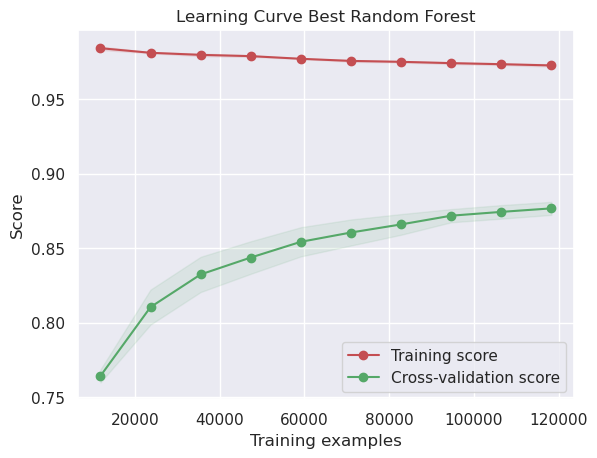

In [12]:
plot_learning_curve(best_model_rf, X_train, y_train, title="Learning Curve Best Random Forest")
plt.show()

# k-Nearest Neighbors

In [13]:
knn_model = KNeighborsClassifier(n_jobs=n_jobs)
knn_model.fit(X_train.values, y_train)

KNeighborsClassifier(n_jobs=-1)

In [14]:
y_pred = knn_model.predict(X_train.values)

print(classification_report(y_train, y_pred))

                       precision    recall  f1-score   support

            adnxs.com       0.77      0.87      0.82      3839
      ads-twitter.com       0.74      0.82      0.78      1325
        chartbeat.com       0.81      0.89      0.85      1413
       contextweb.com       0.72      0.79      0.75      2824
           disqus.com       0.63      0.58      0.60      3173
      everesttech.net       0.86      0.88      0.87      3408
  fastly-insights.com       0.92      0.90      0.91      1309
           fastly.net       0.81      0.80      0.81      1869
            ftcdn.net       0.99      0.99      0.99      3455
            giphy.com       0.81      0.86      0.83      3886
githubusercontent.com       0.85      0.84      0.85      4271
             krxd.net       0.79      0.89      0.84     11144
         newrelic.com       0.69      0.75      0.72      2182
                other       0.83      0.80      0.81     35083
         outbrain.com       0.68      0.58      0.63  

In [15]:
y_pred = knn_model.predict(X_test.values)
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

            adnxs.com       0.63      0.73      0.67      2942
      ads-twitter.com       0.54      0.63      0.58      1135
        chartbeat.com       0.76      0.85      0.80      1717
       contextweb.com       0.49      0.60      0.54      2383
           disqus.com       0.41      0.34      0.37      3246
      everesttech.net       0.73      0.76      0.74      2894
  fastly-insights.com       0.74      0.68      0.71       686
           fastly.net       0.52      0.51      0.52      1455
            ftcdn.net       0.97      0.93      0.95      1607
            giphy.com       0.62      0.72      0.67      1730
githubusercontent.com       0.62      0.59      0.60      4477
             krxd.net       0.68      0.81      0.74     11171
         newrelic.com       0.53      0.65      0.58      1604
                other       0.71      0.62      0.66     34777
         outbrain.com       0.47      0.40      0.43  

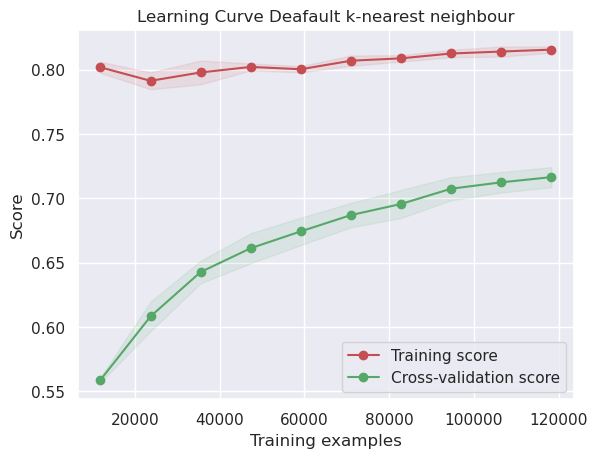

In [16]:
plot_learning_curve(knn_model, X_train, y_train, title="Learning Curve Deafault k-nearest neighbour")
plt.show()

## Corss Validation

In [22]:
param_grid = {
    'n_neighbors': [3, 5, 7, 8, 9, 10, 11, 12, 13],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs = n_jobs)
grid_search.fit(X_train.values, y_train_encoded)

print("Best parameters:", grid_search.best_params_)

print("Best score:", grid_search.best_score_)

# Best parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

Best parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best score: 0.7614142427845207


In [23]:
#### TEST TO NOT RECOMPILE CROSS VALIDATION

Best_Hyperparameters_knn = {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
best_model_knn = KNeighborsClassifier(
    n_jobs=n_jobs,
    n_neighbors=Best_Hyperparameters_knn['n_neighbors'],
    p=Best_Hyperparameters_knn['p'],
    weights=Best_Hyperparameters_knn['weights'],
)

In [19]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

best_model_knn.fit(X_train.values, y_train_encoded)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11, p=1, weights='distance')

In [20]:
y_pred_best = best_model_knn.predict(X_train.values)

y_pred_best_original = label_encoder.inverse_transform(y_pred_best)

print("Classification Report on Test Set:")
print(classification_report(y_train, y_pred_best_original))

Classification Report on Test Set:
                       precision    recall  f1-score   support

            adnxs.com       0.98      0.98      0.98      3839
      ads-twitter.com       1.00      0.98      0.99      1325
        chartbeat.com       0.99      0.99      0.99      1413
       contextweb.com       1.00      0.97      0.98      2824
           disqus.com       0.99      0.97      0.98      3173
      everesttech.net       0.99      0.98      0.99      3408
  fastly-insights.com       1.00      0.99      0.99      1309
           fastly.net       1.00      0.99      0.99      1869
            ftcdn.net       1.00      1.00      1.00      3455
            giphy.com       1.00      0.96      0.98      3886
githubusercontent.com       1.00      1.00      1.00      4271
             krxd.net       0.93      0.99      0.96     11144
         newrelic.com       0.97      0.98      0.97      2182
                other       0.97      0.98      0.98     35083
         outbrain.c

In [21]:
y_pred_best = best_model_knn.predict(X_test.values)
y_pred_best_original = label_encoder.inverse_transform(y_pred_best)

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_best_original))

Classification Report on Test Set:
                       precision    recall  f1-score   support

            adnxs.com       0.76      0.75      0.76      2942
      ads-twitter.com       0.71      0.67      0.69      1135
        chartbeat.com       0.75      0.87      0.81      1717
       contextweb.com       0.59      0.60      0.60      2383
           disqus.com       0.52      0.35      0.42      3246
      everesttech.net       0.79      0.78      0.79      2894
  fastly-insights.com       0.78      0.72      0.75       686
           fastly.net       0.72      0.53      0.61      1455
            ftcdn.net       0.97      0.95      0.96      1607
            giphy.com       0.66      0.74      0.70      1730
githubusercontent.com       0.70      0.62      0.66      4477
             krxd.net       0.69      0.84      0.76     11171
         newrelic.com       0.64      0.70      0.67      1604
                other       0.74      0.62      0.67     34777
         outbrain.c

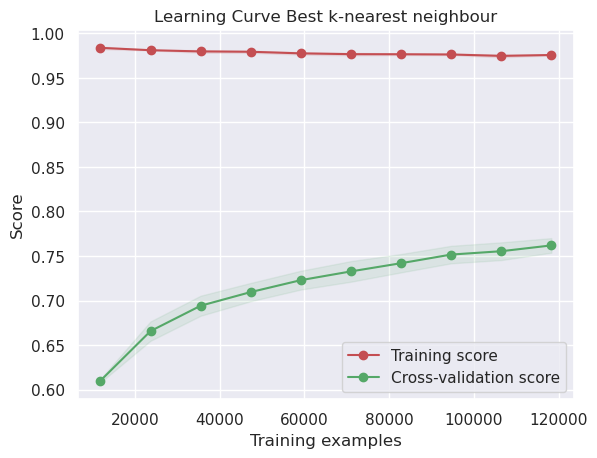

In [24]:
plot_learning_curve(best_model_knn, X_train, y_train, title="Learning Curve Best k-nearest neighbour")
plt.show()

# Nerual Network

In [25]:
def create_model(optimizer='adam', activation='relu', dropout_rate=0.2):
    model = Sequential([
        Dense(128, activation=activation, input_shape=(len(X_train.columns),)),
        Dropout(dropout_rate),
        Dense(np.max(y_train_encoded) + 1, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [26]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

model = create_model()

model.fit(X_train, y_train_encoded, epochs=10)

Epoch 1/10
4621/4621 [==============================] - 8s 2ms/step - loss: 1.9548 - accuracy: 0.3916
Epoch 2/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.7399 - accuracy: 0.4448
Epoch 3/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.6723 - accuracy: 0.4639
Epoch 4/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.6333 - accuracy: 0.4759
Epoch 5/10
4621/4621 [==============================] - 7s 1ms/step - loss: 1.6104 - accuracy: 0.4819
Epoch 6/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.5931 - accuracy: 0.4868
Epoch 7/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.5804 - accuracy: 0.4927
Epoch 8/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.5660 - accuracy: 0.4960
Epoch 9/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.5601 - accuracy: 0.4972
Epoch 10/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.548

In [27]:
y_pred = model.predict(X_train)

y_pred_classes = np.argmax(y_pred, axis=1)

y_pred_original = label_encoder.inverse_transform(y_pred_classes)
print(classification_report(y_train, y_pred_original))

4621/4621 [==============================] - 4s 845us/step


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

            adnxs.com       0.62      0.34      0.43      3839
      ads-twitter.com       0.48      0.10      0.17      1325
        chartbeat.com       0.00      0.00      0.00      1413
       contextweb.com       0.60      0.33      0.43      2824
           disqus.com       0.63      0.12      0.20      3173
      everesttech.net       0.73      0.51      0.60      3408
  fastly-insights.com       0.96      0.39      0.56      1309
           fastly.net       0.82      0.21      0.33      1869
            ftcdn.net       0.88      0.83      0.85      3455
            giphy.com       0.68      0.37      0.48      3886
githubusercontent.com       0.69      0.41      0.51      4271
             krxd.net       0.42      0.65      0.51     11144
         newrelic.com       0.06      0.00      0.00      2182
                other       0.44      0.52      0.48     35083
         outbrain.com       0.00      0.00      0.00  

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

y_pred_original = label_encoder.inverse_transform(y_pred_classes)
print(classification_report(y_test, y_pred_original))

3581/3581 [==============================] - 3s 854us/step


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

            adnxs.com       0.67      0.25      0.36      2942
      ads-twitter.com       0.50      0.08      0.14      1135
        chartbeat.com       0.00      0.00      0.00      1717
       contextweb.com       0.59      0.28      0.38      2383
           disqus.com       0.62      0.09      0.15      3246
      everesttech.net       0.69      0.44      0.53      2894
  fastly-insights.com       0.92      0.41      0.57       686
           fastly.net       0.85      0.19      0.32      1455
            ftcdn.net       0.84      0.83      0.84      1607
            giphy.com       0.44      0.32      0.37      1730
githubusercontent.com       0.59      0.29      0.39      4477
             krxd.net       0.46      0.65      0.54     11171
         newrelic.com       0.13      0.00      0.00      1604
                other       0.47      0.52      0.49     34777
         outbrain.com       0.00      0.00      0.00  

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
3697/3697 [==============================] - 7s 2ms/step - loss: 1.9906 - accuracy: 0.3840 - val_loss: 1.7779 - val_accuracy: 0.4457
Epoch 2/10
3697/3697 [==============================] - 6s 2ms/step - loss: 1.7681 - accuracy: 0.4370 - val_loss: 1.6863 - val_accuracy: 0.4637
Epoch 3/10
3697/3697 [==============================] - 6s 2ms/step - loss: 1.7075 - accuracy: 0.4562 - val_loss: 1.6403 - val_accuracy: 0.4720
Epoch 4/10
3697/3697 [==============================] - 7s 2ms/step - loss: 1.6718 - accuracy: 0.4655 - val_loss: 1.6091 - val_accuracy: 0.4977
Epoch 5/10
3697/3697 [==============================] - 7s 2ms/step - loss: 1.6497 - accuracy: 0.4722 - val_loss: 1.5796 - val_accuracy: 0.5028
Epoch 6/10
3697/3697 [==============================] - 7s 2ms/step - loss: 1.6245 - accuracy: 0.4798 - val_loss: 1.5578 - val_accuracy: 0.5120
Epoch 7/10
3697/3697 [==============================] - 7s 2ms/step - loss: 1.6032 - accuracy: 0.4850 - val_loss: 1.5382 - val_accuracy:

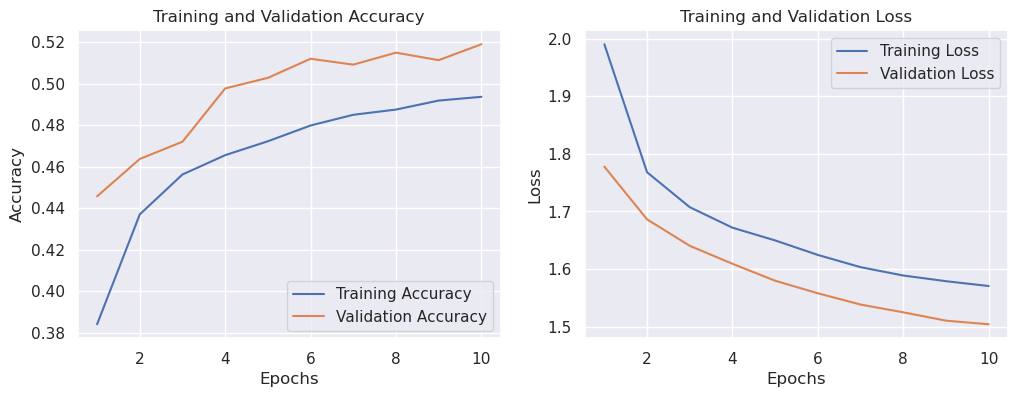

In [29]:
X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

num_epochs = 10

# Train the model with the training set and validate with the validation set
history = create_model().fit(X_train_s, y_train_s, epochs=num_epochs, validation_data=(X_val, y_val))

# Extract accuracy and loss values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epochs
epochs = np.arange(1, num_epochs + 1)

# Plot the learning curve for accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the learning curve for loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()

In [30]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [31]:
# Definisci gli iperparametri da cercare
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.2, 0.3]
}

# Definisci il numero di fold per la cross-validation
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Inizia la ricerca degli iperparametri e la cross-validation manualmente
best_score = 0
best_params = {}

for optimizer in param_grid['optimizer']:
    for activation in param_grid['activation']:
        for dropout_rate in param_grid['dropout_rate']:
            scores = []
            
            for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
                X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
                y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

                model = create_model(optimizer=optimizer, activation=activation, dropout_rate=dropout_rate)
                model.fit(X_train_fold, y_train_fold, epochs=5, verbose=0)

                _, score = model.evaluate(X_val_fold, y_val_fold, verbose=0)
                scores.append(score)

            avg_score = np.mean(scores)
            print(f'Mean validation accuracy for {optimizer}, {activation}, {dropout_rate}: {avg_score}')

            if avg_score > best_score:
                best_score = avg_score
                best_params = {'optimizer': optimizer, 'activation': activation, 'dropout_rate': dropout_rate}

print(f'Best parameters: {best_params}, Best validation accuracy: {best_score}')
# Best parameters: {'optimizer': 'adam', 'activation': 'relu', 'dropout_rate': 0.2}
# Best validation accuracy: 0.4987184166908264

Mean validation accuracy for adam, relu, 0.2: 0.4987184166908264
Mean validation accuracy for adam, relu, 0.3: 0.49008203744888307
Mean validation accuracy for adam, tanh, 0.2: 0.4419767618179321
Mean validation accuracy for adam, tanh, 0.3: 0.42367600798606875
Mean validation accuracy for sgd, relu, 0.2: 0.42086940407752993
Mean validation accuracy for sgd, relu, 0.3: 0.42136979699134824
Mean validation accuracy for sgd, tanh, 0.2: 0.35668835043907166
Mean validation accuracy for sgd, tanh, 0.3: 0.3483157455921173
Best parameters: {'optimizer': 'adam', 'activation': 'relu', 'dropout_rate': 0.2}, Best validation accuracy: 0.4987184166908264


In [32]:
#### TEST TO NOT RECOMPILE CROSS VALIDATION
best_params = {'optimizer': 'adam', 'activation': 'relu', 'dropout_rate': 0.2}

In [33]:
final_model = create_model(**best_params)
final_model.fit(X_train, y_train_encoded, epochs=10)

Epoch 1/10
4621/4621 [==============================] - 8s 2ms/step - loss: 1.9610 - accuracy: 0.3902
Epoch 2/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.7408 - accuracy: 0.4450
Epoch 3/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.6746 - accuracy: 0.4625
Epoch 4/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.6383 - accuracy: 0.4741
Epoch 5/10
4621/4621 [==============================] - 7s 1ms/step - loss: 1.6124 - accuracy: 0.4808
Epoch 6/10
4621/4621 [==============================] - 7s 1ms/step - loss: 1.5958 - accuracy: 0.4848
Epoch 7/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.5805 - accuracy: 0.4890
Epoch 8/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.5697 - accuracy: 0.4929
Epoch 9/10
4621/4621 [==============================] - 7s 2ms/step - loss: 1.5604 - accuracy: 0.4958
Epoch 10/10
4621/4621 [==============================] - 7s 1ms/step - loss: 1.551